In [0]:
from fastai.vision import *

In [0]:
%%capture
!unzip "/content/drive/My Drive/CRISMIS_Dataset_v3.zip"

In [0]:
path = Path('/content/CRISMIS_Dataset_v3') # Define path to the image folders

np.random.seed(42)

data = ImageDataBunch.from_folder(path, 
                                  train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(do_flip=True, 
                                                         flip_vert=True, 
                                                         max_rotate=360.0, 
                                                         max_zoom=1.5, 
                                                         max_lighting=0.5, 
                                                         p_affine=0.75, 
                                                         p_lighting=0.75), 
                                  size=(256,256),
                                  resize_method=ResizeMethod.SQUISH,
                                  num_workers=4, 
                                  bs = 16) \
        .normalize(imagenet_stats)

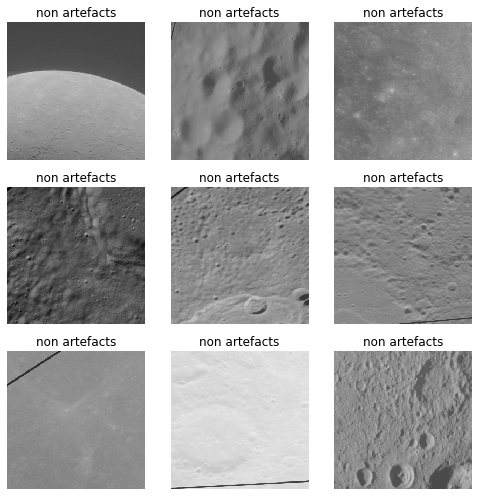

In [4]:
data.show_batch(rows=3, figsize=(7, 7))

In [5]:
data.classes

['artefacts', 'non artefacts']

In [6]:
learn = cnn_learner(data, 
                     models.resnet50,       
                     metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [8]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.061216,0.027641,0.988235,00:38
1,0.118281,0.060490,0.982353,00:37
2,0.068880,0.014691,0.997059,00:38
3,0.057023,0.013383,0.994118,00:38
4,0.051755,0.008446,0.997059,00:38


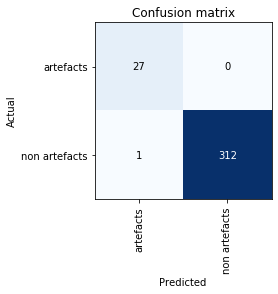

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [0]:
# interp.plot_top_losses(5, figsize = (10,10))

In [0]:
learn.export()

In [12]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
print(gpu_info)

Thu Mar 12 06:28:08 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    76W / 149W |   2478MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  